                            Tokyo Statistics Analysis

In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
import openpyxl

In [4]:
try:
    tokyo = pd.read_excel('TokyoOlympics/Medals.xlsx')
    print()
except:
    print('No such dataset..............')

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
tokyo

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


# Estimates of Location

In [6]:
# mean of Total column
tokyo['Total'].mean() # add all the values then by the total number of values

11.612903225806452

In [7]:
# weighted mean
np.average(tokyo['Gold'], weights=tokyo['Total'])

14.743518518518519

In [10]:
# Trimmed mean
from scipy.stats import trim_mean
trim_mean(tokyo['Gold'], 0.1, axis=0) # 0.1 -> top 10 percent

1.96

In [11]:
# median
tokyo['Total'].median()

4.0

In [12]:
# weighted median

def weighted_mean(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum()/2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_mean(tokyo, 'Total', 'Gold')

40

In [15]:
# percentile
q3 = np.percentile(tokyo['Total'], 75)
q3

11.0

# Estimates of Variability (Dispersion Metrics)

In [16]:
from statistics import variance
variance(tokyo['Gold'])

49.315100514259

In [17]:
# If you have already calculated the mean of your data, you can pass it as the optional second argument xbar to avoid recalculating it:

m = tokyo['Gold'].mean()
variance(tokyo['Gold'], m)

49.315100514259

In [18]:
# This function does not check that xbar is actually the mean of data. Giving arbitrary values for xbar may lead to invalid or impossible results.
# Decimals and Fractions are supported:

from decimal import Decimal as D
print(variance([D("27.5"), D("30.25"), D("30.25"), D("34.5"), D("41.75")]))

from fractions import Fraction as F
print(variance([F(1, 6), F(1, 2), F(5, 3)]))

31.01875
67/108


In [19]:
# standard deviation/ l2 norm/ euclidean norm  -> Return the square root of the sample variance.
from statistics import stdev
stdev(tokyo['Gold'])

7.022471111671376

In [20]:
# mean absolute deviation/ manhattan norm/ l1 norm
from numpy import mean, absolute

mean(absolute(tokyo['Gold'] - mean(tokyo['Gold'])))

4.0048560527228565

In [21]:
# median absolute deviation

from numpy import median, absolute
median(absolute(tokyo['Gold'] - median(tokyo['Gold'])))

1.0

In [22]:
# Interquartile range

q3, q1 = np.percentile(tokyo['Gold'], [75, 25])
iqr = q3 - q1
iqr

3.0

# Exploring Data Distribution

<AxesSubplot: >

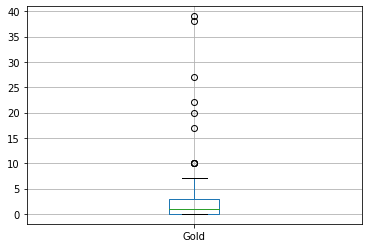

In [23]:
# boxplot

tokyo.boxplot(column='Gold', by=None, ax=None)

In [24]:
# frequency table

frequency_table = tokyo.copy()
frequency_table['freq'] = pd.cut(tokyo['Gold'], 10) # 10  -> Give us 10 sections
frequency_table.groupby('freq')['Rank'].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


In [25]:
# histogram

np.histogram(tokyo['Gold'], bins=10) # it does not draw

(array([72, 11,  4,  0,  1,  2,  1,  0,  0,  2], dtype=int64),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]))

(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

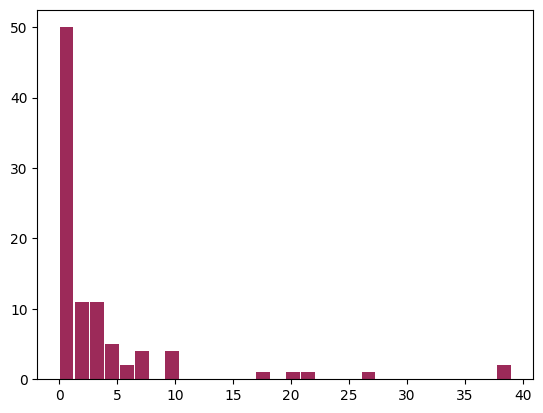

In [32]:
from matplotlib import pyplot as plt

plt.hist(
    x=tokyo['Gold'], bins='auto', color='#911347', alpha=0.9, rwidth=0.9
)

# Statistical Moments

- A set of statistical parameters that measure distributions

- moments include:

1) First Moment is Location - `Mean`
1) Second Moment is Variability - `How closely values are spread around the mean`
1) Third Moment is Skewness - `Direction of the Tail of the data`
1) Fourth Moment is Kurtosis - `Propensity for data to have extreme values`

# Density Plots and Estimates

<AxesSubplot: ylabel='Density'>

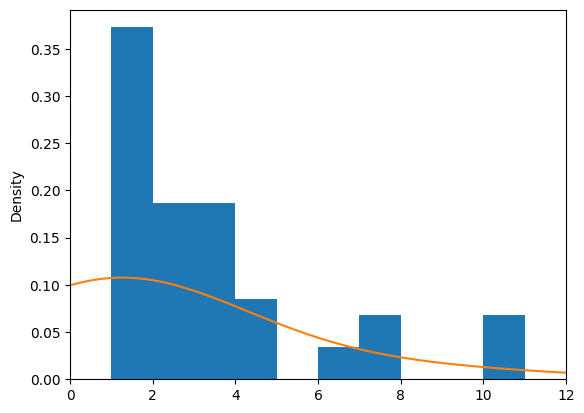

In [33]:
# density plot
ax = tokyo['Gold'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
tokyo['Gold'].plot.density(ax=ax)

# Exploring Binary and Categorical Data

In [34]:
# mode
tokyo['Gold'].mode()

0    0
Name: Gold, dtype: int64

In [ ]:
# expected value


Text(0, 0.5, 'Country')

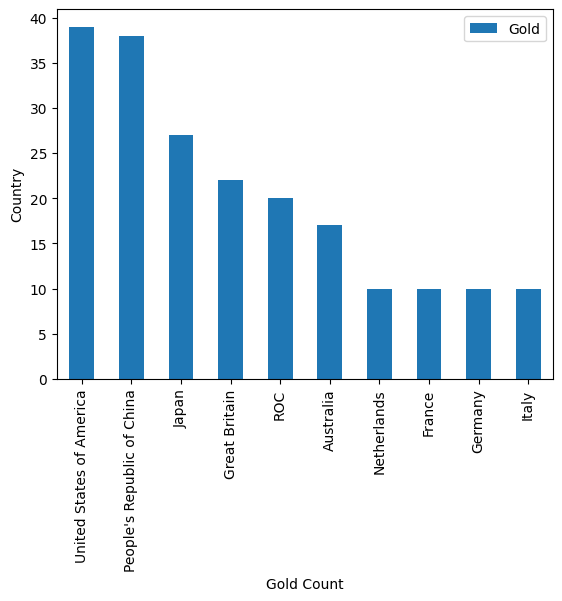

In [37]:
# bar chart

ax = tokyo.iloc[:10,:].plot.bar(
    x='Team/NOC', y='Gold'
)
ax.set_xlabel('Gold Count')
ax.set_ylabel('Country')

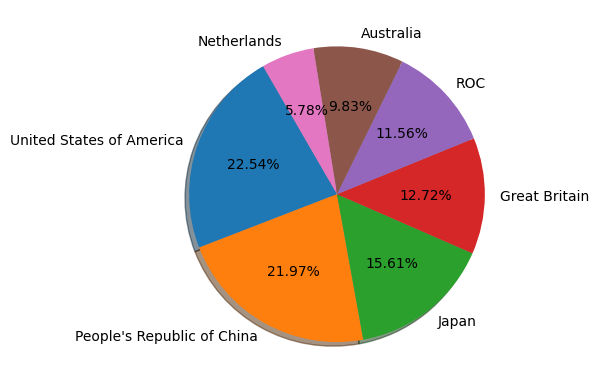

In [45]:
# pie chart

pie_data = tokyo.iloc[:7, :]

plt.pie(
    pie_data['Gold'], labels=pie_data['Team/NOC'], autopct='%.2f%%',
    shadow=True, startangle=120
)
plt.show()

# Correlation

In [50]:
tokyo.corr(numeric_only=True)

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


# Scatter Plot

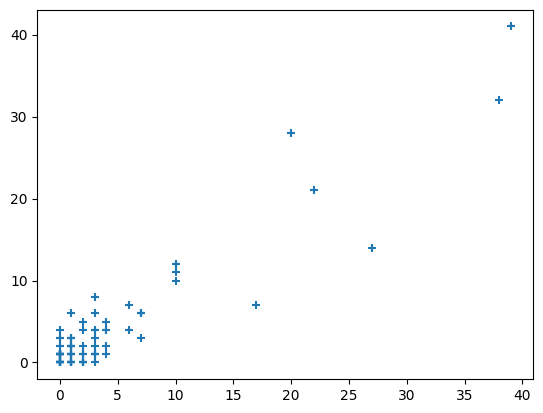

In [54]:
plt.scatter(x=tokyo['Gold'], y=tokyo['Silver'], marker='+')

<AxesSubplot: xlabel='Gold', ylabel='Silver'>

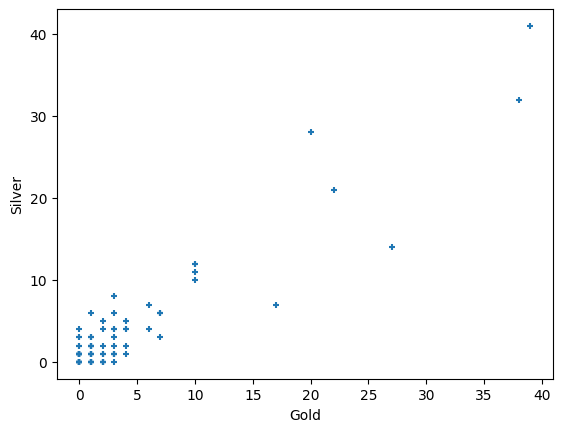

In [55]:
tokyo.plot.scatter(x='Gold', y='Silver', marker='+')

# Bivariate Analysis

<AxesSubplot: xlabel='Gold', ylabel='Silver'>

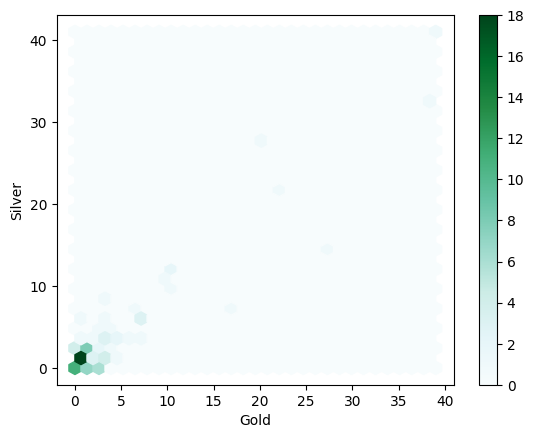

In [57]:
# Hexagonal Binning plot

tokyo.plot.hexbin(
    x='Gold', y='Silver', gridsize=30, sharex=False
)

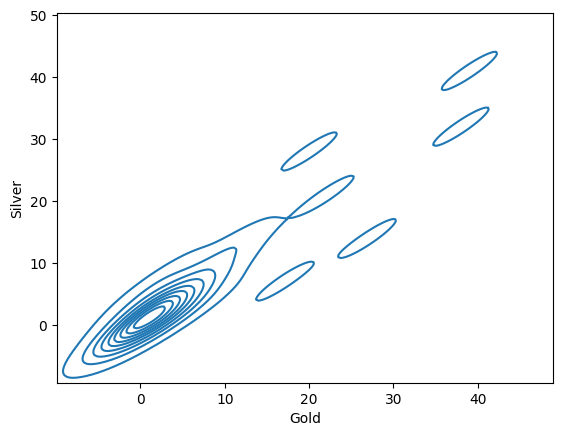

In [60]:
# contour plot

ax = sns.kdeplot(
    data=tokyo, x='Gold', y='Silver'
)

<AxesSubplot: >

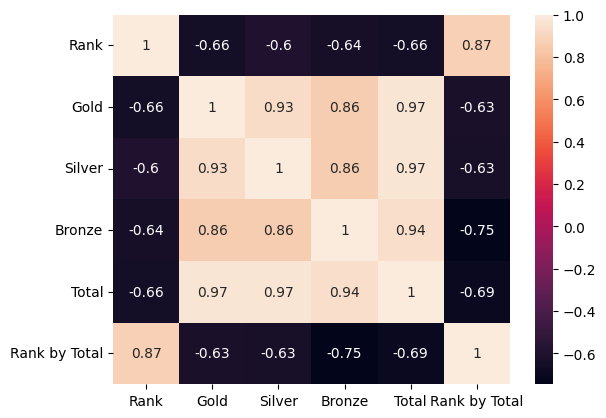

In [63]:
# heatmap

sns.heatmap(tokyo.corr(numeric_only=True),  annot=True)

In [69]:
# Contingency Table

crosstab = tokyo[['Silver', 'Gold']].pivot_table(index='Silver', columns='Gold', 
                            aggfunc=lambda x: len(x) ,margins=True)
crosstab.fillna(0, inplace=True)
crosstab

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<AxesSubplot: xlabel='Silver'>

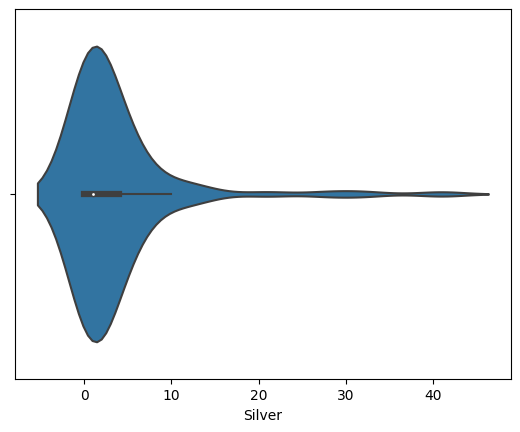

In [71]:
# violin plot

sns.violinplot(
    data=tokyo, x='Silver'
)

<AxesSubplot: xlabel='Gold'>

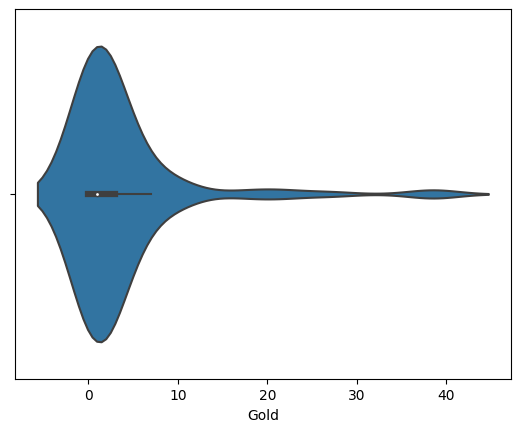

In [70]:
# violin plot

sns.violinplot(
    data=tokyo, x='Gold'
)

In [ ]:
# Correlation heatmap plot

In [ ]:
# Facets and Trellis plots